<a href="https://colab.research.google.com/github/ANKITPODDER2000/CNN_Colab/blob/master/cnnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("./sample_data/mnist_train_small.csv",names=[str(i) for i in range(1,786)])

In [0]:
test = pd.read_csv("./sample_data/mnist_test.csv",names=[str(i) for i in range(1,786)])

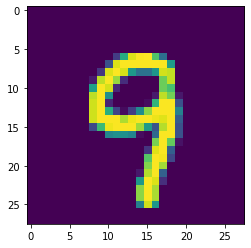

In [27]:
plt.imshow((train.iloc[50][1:]).values.reshape((28,28)))

In [0]:
#train.head()

In [0]:
y_train = train.loc[:,'1'].values

In [0]:
X_train = train.drop("1",axis=1)

In [0]:
X_train = X_train.loc[:].values.reshape((20000,28,28,1))

In [40]:
X_train[0].shape

(28, 28, 1)

In [0]:
y_test = test.loc[:,'1'].values

In [0]:
X_test = test.drop("1",axis=1)

In [0]:
X_test = X_test.loc[:].values.reshape((10000,28,28,1))

### **MODEL1**

In [0]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation="relu"),
  tf.keras.layers.Dense(10,activation="sigmoid")
])

In [0]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [74]:
history1 = model1.fit(X_train,y_train,batch_size=128,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
157/157 [==============================] - 1s 6ms/step - loss: 1.4181 - acc: 0.5101 - val_loss: 0.3559 - val_acc: 0.8851
Epoch 2/20
157/157 [==============================] - 1s 5ms/step - loss: 0.2383 - acc: 0.9278 - val_loss: 0.2038 - val_acc: 0.9347
Epoch 3/20
157/157 [==============================] - 1s 5ms/step - loss: 0.1271 - acc: 0.9603 - val_loss: 0.1642 - val_acc: 0.9538
Epoch 4/20
157/157 [==============================] - 1s 5ms/step - loss: 0.0872 - acc: 0.9729 - val_loss: 0.1472 - val_acc: 0.9529
Epoch 5/20
157/157 [==============================] - 1s 5ms/step - loss: 0.0685 - acc: 0.9789 - val_loss: 0.1380 - val_acc: 0.9615
Epoch 6/20
157/157 [==============================] - 1s 5ms/step - loss: 0.0515 - acc: 0.9837 - val_loss: 0.1334 - val_acc: 0.9690
Epoch 7/20
157/157 [==============================] - 1s 5ms/step - loss: 0.0431 - acc: 0.9855 - val_loss: 0.1254 - val_acc: 0.9717
Epoch 8/20
157/157 [==============================] - 1s 5ms/step - loss: 0.

In [0]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation="relu"),
  tf.keras.layers.Dense(10,activation="sigmoid")
])
model2.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [71]:
history2 = model2.fit(train_datagen.flow(X_train,y_train),batch_size=128,steps_per_epoch=20000//128,epochs=20,validation_data=test_datagen.flow(X_test,y_test),validation_steps=10000//128)

Epoch 1/20
156/156 [==============================] - 2s 10ms/step - loss: 0.7165 - acc: 0.7652 - val_loss: 0.3333 - val_acc: 0.8986
Epoch 2/20
156/156 [==============================] - 2s 10ms/step - loss: 0.5107 - acc: 0.8319 - val_loss: 0.3200 - val_acc: 0.8958
Epoch 3/20
156/156 [==============================] - 2s 10ms/step - loss: 0.4371 - acc: 0.8592 - val_loss: 0.3224 - val_acc: 0.8966
Epoch 4/20
156/156 [==============================] - 2s 10ms/step - loss: 0.3699 - acc: 0.8836 - val_loss: 0.1995 - val_acc: 0.9379
Epoch 5/20
156/156 [==============================] - 2s 10ms/step - loss: 0.3119 - acc: 0.9052 - val_loss: 0.3038 - val_acc: 0.9071
Epoch 6/20
156/156 [==============================] - 2s 10ms/step - loss: 0.3121 - acc: 0.8994 - val_loss: 0.1697 - val_acc: 0.9395
Epoch 7/20
156/156 [==============================] - 2s 10ms/step - loss: 0.2657 - acc: 0.9197 - val_loss: 0.1739 - val_acc: 0.9407
Epoch 8/20
156/156 [==============================] - 2s 10ms/step - 

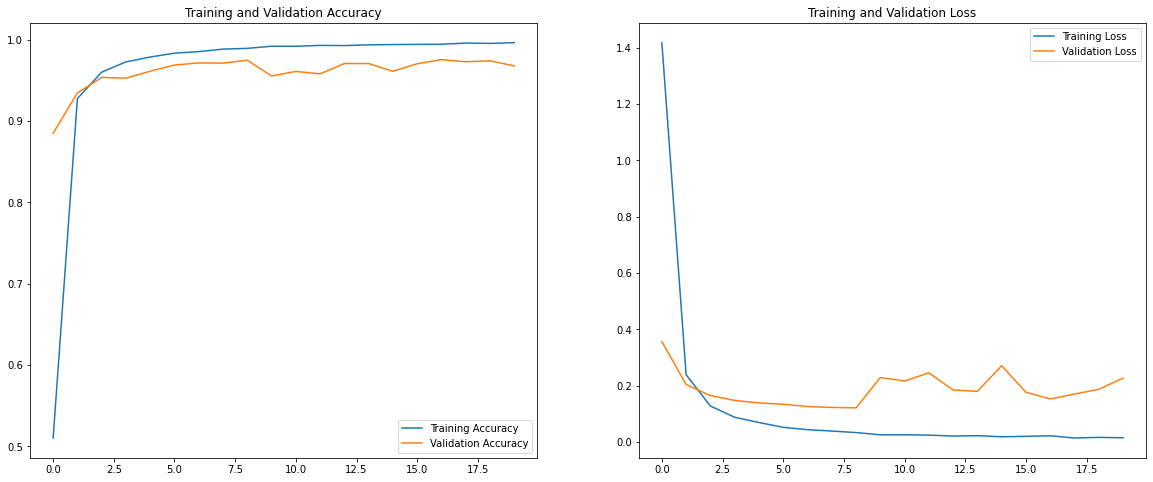

In [76]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

loss = history1.history['loss']
val_loss = history1.history['val_loss']


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

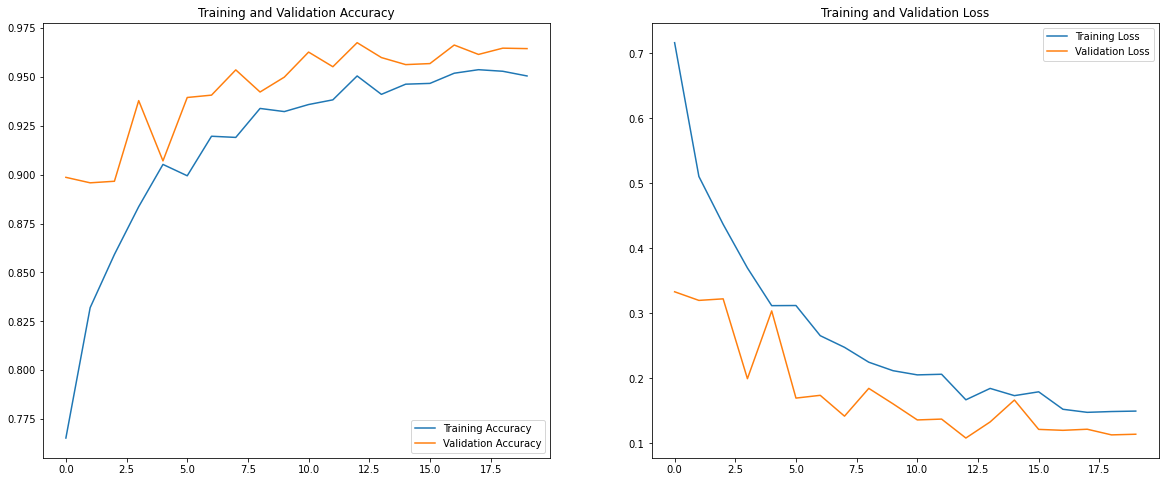

In [77]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

loss = history2.history['loss']
val_loss = history2.history['val_loss']


plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [78]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation="relu"),
  tf.keras.layers.Dense(10,activation="sigmoid")
])
model3.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])
history3 = model3.fit(train_datagen.flow(X_train,y_train),batch_size=128,steps_per_epoch=20000//128,epochs=20,validation_data=test_datagen.flow(X_test,y_test),validation_steps=10000//128)

Epoch 1/20
156/156 [==============================] - 2s 11ms/step - loss: 1.5604 - acc: 0.4601 - val_loss: 0.6874 - val_acc: 0.8009
Epoch 2/20
156/156 [==============================] - 2s 10ms/step - loss: 0.8603 - acc: 0.7143 - val_loss: 0.4421 - val_acc: 0.8598
Epoch 3/20
156/156 [==============================] - 2s 10ms/step - loss: 0.6269 - acc: 0.8039 - val_loss: 0.3002 - val_acc: 0.9042
Epoch 4/20
156/156 [==============================] - 2s 10ms/step - loss: 0.4937 - acc: 0.8403 - val_loss: 0.2098 - val_acc: 0.9363
Epoch 5/20
156/156 [==============================] - 2s 10ms/step - loss: 0.4311 - acc: 0.8602 - val_loss: 0.2017 - val_acc: 0.9303
Epoch 6/20
156/156 [==============================] - 2s 10ms/step - loss: 0.3891 - acc: 0.8798 - val_loss: 0.2123 - val_acc: 0.9355
Epoch 7/20
156/156 [==============================] - 2s 10ms/step - loss: 0.3451 - acc: 0.8896 - val_loss: 0.1527 - val_acc: 0.9547
Epoch 8/20
156/156 [==============================] - 2s 10ms/step - 

In [0]:
def loss_acc(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']


  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot( val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

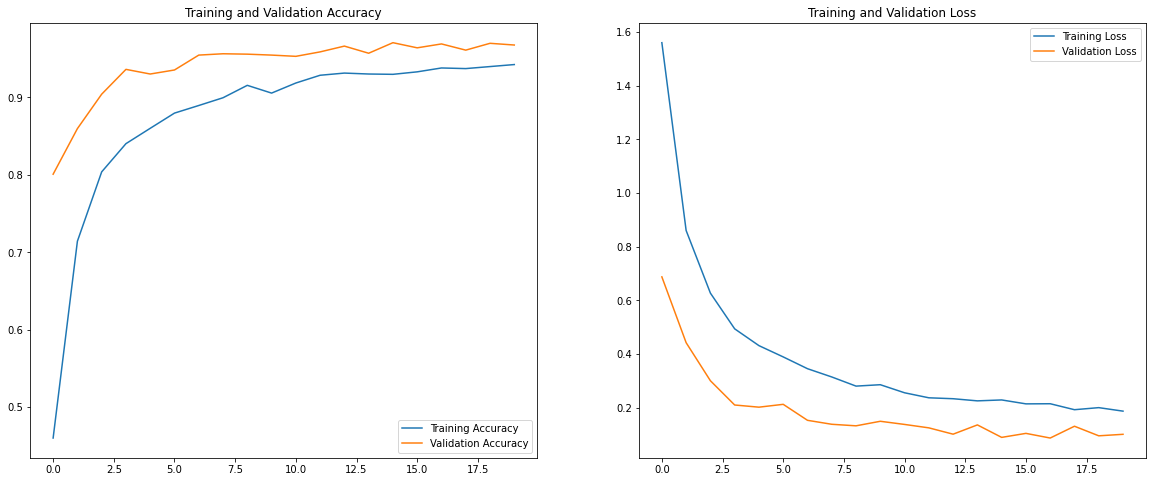

In [80]:
loss_acc(history3)

In [81]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512,activation="relu"),
  tf.keras.layers.Dense(10,activation="sigmoid")
])
model4.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])
history4 = model4.fit(train_datagen.flow(X_train,y_train),batch_size=128,steps_per_epoch=20000//128,epochs=20,validation_data=test_datagen.flow(X_test,y_test),validation_steps=10000//128)

Epoch 1/20
156/156 [==============================] - 2s 10ms/step - loss: 1.6059 - acc: 0.4331 - val_loss: 0.6595 - val_acc: 0.8233
Epoch 2/20
156/156 [==============================] - 2s 10ms/step - loss: 0.8878 - acc: 0.6973 - val_loss: 0.4416 - val_acc: 0.8650
Epoch 3/20
156/156 [==============================] - 2s 10ms/step - loss: 0.7016 - acc: 0.7700 - val_loss: 0.3701 - val_acc: 0.8794
Epoch 4/20
156/156 [==============================] - 2s 10ms/step - loss: 0.5456 - acc: 0.8249 - val_loss: 0.3509 - val_acc: 0.8871
Epoch 5/20
156/156 [==============================] - 2s 10ms/step - loss: 0.4937 - acc: 0.8401 - val_loss: 0.2434 - val_acc: 0.9215
Epoch 6/20
156/156 [==============================] - 2s 10ms/step - loss: 0.4327 - acc: 0.8694 - val_loss: 0.2067 - val_acc: 0.9403
Epoch 7/20
156/156 [==============================] - 2s 10ms/step - loss: 0.4028 - acc: 0.8722 - val_loss: 0.1938 - val_acc: 0.9399
Epoch 8/20
156/156 [==============================] - 2s 10ms/step - 

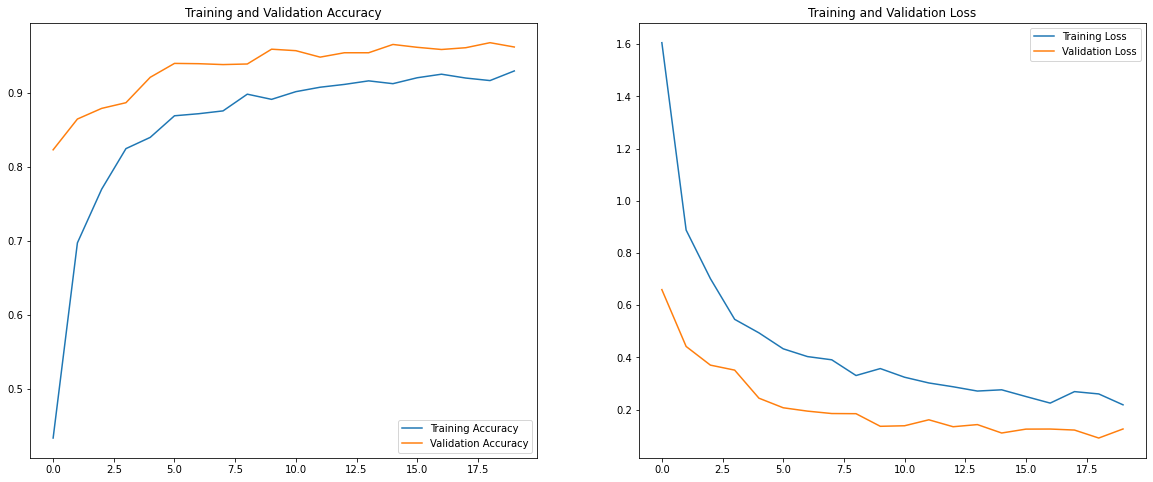

In [82]:
loss_acc(history4)